# Pandas Breakout Questions

To get some hands on experience with `pandas` we will be working with the somewhat morose dataset looking at all the mass shooting events that occured in 2015 (`./data/mass_shootings_2015.csv`)

In [2]:
import pandas as pd

## 1. Reading in the Dataframe

First things first, we must read in our dataset!
Turn to your neighbor and figure out how to read this data into a Dataframe.  Once you have it read in, take a look at the columns and look at some summary statistics.

In [3]:
df = pd.read_csv('./data/mass_shootings_2015.csv')

In [4]:
df.columns

Index([u'Incident Date', u'State', u'City Or County', u'Address', u'# Killed',
       u'# Injured', u'Operations'],
      dtype='object')

In [5]:
df.describe()

,# Killed,# Injured,Operations
count,330.000000,330.000000,0.0
mean,1.112121,3.990909,NaN
std,1.792293,2.218308,NaN
min,0.000000,0.000000,NaN
25%,0.000000,3.000000,NaN
50%,1.000000,4.000000,NaN
75%,1.000000,5.000000,NaN
max,16.000000,19.000000,NaN


## 2. Clean Column Names

The first thing I always do when reading in a Datafram is clean up our column names!  Personally I view spaces, special characters, and capitals in column names as no-no's.  Granted this isn't a hard and fast rule but we have already seen cases where having spaces in column names causes issues.

With your neighbor, clean the columns names of this Dataframe!

In [14]:
cols = [col.replace(' ', '_').replace('#', 'number').lower() for col in df.columns.tolist()]

In [15]:
df.columns = cols

In [16]:
df.columns

Index([u'incident_date', u'state', u'city_or_county', u'address',
       u'number_killed', u'number_injured', u'operations'],
      dtype='object')

## 3. Cast the `date` column as a datetime object

We can see from our initial look at this data that the `date` column is actually an object (basically a string).  Let's alter this column to make it an actual date!

HINT: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [35]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [36]:
df['incident_date']

0     2015-12-31
1     2015-12-27
2     2015-12-26
3     2015-12-25
4     2015-12-25
5     2015-12-21
6     2015-12-20
7     2015-12-20
8     2015-12-20
9     2015-12-14
10    2015-12-13
11    2015-12-13
12    2015-12-12
13    2015-12-11
14    2015-12-11
15    2015-12-08
16    2015-12-06
17    2015-12-06
18    2015-12-02
19    2015-12-02
20    2015-11-29
21    2015-11-27
22    2015-11-27
23    2015-11-24
24    2015-11-23
25    2015-11-23
26    2015-11-22
27    2015-11-22
28    2015-11-22
29    2015-11-22
         ...    
300   2015-02-09
301   2015-02-08
302   2015-02-07
303   2015-02-06
304   2015-02-05
305   2015-02-01
306   2015-02-01
307   2015-01-31
308   2015-01-28
309   2015-01-26
310   2015-01-24
311   2015-01-24
312   2015-01-23
313   2015-01-20
314   2015-01-19
315   2015-01-16
316   2015-01-13
317   2015-01-13
318   2015-01-11
319   2015-01-11
320   2015-01-11
321   2015-01-10
322   2015-01-09
323   2015-01-08
324   2015-01-07
325   2015-01-06
326   2015-01-04
327   2015-01-

## 4. Make a new column `month`

Using that `date` column, create a new column called `month` that will have an `int` representing the ordinal month (e.g. `1` would indicate January)

HINT: Try pulling out a single date (use `.loc` for practice!) and extract the month.  Then try using the `.map` function to create a new column

In [39]:
df['incident_month'] = df['incident_date'].dt.month

,incident_date,state,city_or_county,address,number_killed,number_injured,operations,incident_month
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,NaN,12
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,NaN,12
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN,12
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,NaN,12
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,NaN,12


## 5. Drop the `operations` column

It looks like the operations column doesn't actually contain any useful information so let's drop that!

In [41]:
df.drop('operations', axis = 1, inplace = True)

In [42]:
df.head()

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12


## 6. How many incidents occured in each Month?

Let's look at how many incidents took place in each month.
HINT: (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [60]:
df['number_casualties'] = df.assign(number_casualties = lambda row: row.number_killed + row.number_injured)['number_casualties']

In [61]:
df.head()

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12,5
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12,4
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12,4
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12,4
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4


## 7. How many casualties occured in each Month?

Right now we have the number of people involved broken out into the number killed and the number injured.  Let's create a single column that indicates the number of casualties (i.e. the sum of killed and injured)

In [66]:
df.groupby('incident_month').sum()['number_casualties']

incident_month
1     111
2      85
3     102
4      88
5     185
6     185
7     206
8     200
9     163
10    107
11    137
12    115
Name: number_casualties, dtype: int64

## 8. How many casualties occured by State?

Now that we have a casualties column, let's brake down the number of casualties by state.

In [68]:
df.groupby('state').sum()["number_casualties"]


state
Alabama                  17
Arizona                  29
Arkansas                 16
California              158
Colorado                 20
Connecticut              14
Delaware                  6
District of Columbia      9
Florida                 106
Georgia                  98
Illinois                117
Indiana                  49
Iowa                      9
Kansas                    4
Kentucky                 20
Louisiana                83
Maryland                 61
Massachusetts            24
Michigan                 54
Minnesota                24
Mississippi               9
Missouri                 51
Montana                   5
Nebraska                 17
Nevada                    4
New Jersey               36
New Mexico               11
New York                109
North Carolina           59
Ohio                     67
Oklahoma                 19
Oregon                   24
Pennsylvania             73
Rhode Island              4
South Carolina           51
South Dakota  

## 9. How many distinct City or Counties are represented?

Let's see how many distinct City or Counties are represented in this dataset.

In [69]:
df.head()

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12,5
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12,4
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12,4
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12,4
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4


In [71]:
df['city_or_county'].nunique()

205

## 10. INDEXING!

You should be using `.loc`, `.iloc`, or `.ix` for all of these questions!

1. Return all rows occuring in Alabama
2. Return all shootings with more than 5 people killed
3. Return the address of shootings occuring on or after November 1st
4. Return the address and date of all shootings occuring in Louisiana or Florida with the casualty counts ranging from 6 to 10 (inclusive) 

In [93]:
df.loc[df['state'] == 'Alabama']

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4
35,2015-11-16,Alabama,Cherokee (county),1400 block of County Road 664,3,1,11,4
229,2015-05-24,Alabama,Montgomery,Smiley Court,1,3,5,4
259,2015-04-18,Alabama,Montgomery,1800 block of Gibbs Court,0,5,4,5


In [92]:
df.loc[df['number_killed'] >5]

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties
18,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19,12,35
66,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9,10,19
83,2015-09-17,South Dakota,Platte,36705 379th Street,6,0,9,6
128,2015-08-08,Texas,Houston,2211 Falling Oaks,8,0,8,8
159,2015-07-16,Tennessee,Chattanooga,4051 Amnicola Highway,6,2,7,8
195,2015-06-17,South Carolina,Charleston,110 Calhoun Street,9,0,6,9
235,2015-05-17,Texas,Waco,4671 S Jack Kultgen Expy,9,18,5,27
292,2015-02-26,Missouri,Tyrone,18279 Highway H,8,1,2,9


In [94]:
df.loc[df["incident_month"] >= 11]

,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties
0,2015-12-31,Louisiana,New Orleans,1900 block of Amelia Street,0,5,12,5
1,2015-12-27,Tennessee,Jackson,North Parkway,0,4,12,4
2,2015-12-26,Pennsylvania,Philadelphia,4210 Macalester St,0,4,12,4
3,2015-12-25,Florida,Jacksonville,Franklin and Odessa,0,4,12,4
4,2015-12-25,Alabama,Mobile,785 Schillinger Rd S,0,4,12,4
5,2015-12-21,California,San Leandro,14600 block of East 14th Street,0,4,12,4
6,2015-12-20,North Carolina,Wilmington,11th and Castle Street,1,4,12,5
7,2015-12-20,Florida,Miami (Goulds),21630 Southwest 120th Avenue,1,4,12,5
8,2015-12-20,Florida,Miami-dade (county),Northeast Seventh Avenue and Northeast 166th S...,0,4,12,4
9,2015-12-14,Illinois,Lovejoy (Brooklyn),307 Jefferson St,1,3,12,4


## 11. Sort by Date and reset index

Let's reorder our Dataframe based on the date and reset our index to reflect this.

NOTE: Don't use `df.sort()` as this method is deprecated!  Instead you should be using `df.sort_values()`

In [97]:
df.sort_values('incident_date', axis = 0, inplace = True)

In [105]:
df.reset_index(inplace = True)

In [122]:
import numpy as np

## EXTRA CREDIT:  Create a graph showing the weekly frequency of shootings
HINT: Set the index as the date and refer to http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

In [129]:
len(df.index)

330

In [135]:
df['week'] = df['incident_date'].dt.week
df['tick'] = np.array(1)
df

,index,incident_date,state,city_or_county,address,number_killed,number_injured,incident_month,number_casualties,week,tick
0,329,2015-01-01,Tennessee,Memphis,Interstate 240 and Poplar Avenue,0,5,1,5,1,1
1,328,2015-01-02,Georgia,Savannah,500 block of W. 54th Street,1,4,1,5,1,1
2,326,2015-01-04,Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,1,6,1,1
3,327,2015-01-04,Texas,Dallas,2000 block of Ben Hur St.,3,1,1,4,1,1
4,325,2015-01-06,Florida,Miami,1300 block of NW 62nd Street,1,3,1,4,2,1
5,324,2015-01-07,Tennessee,Chattanooga,773 West Main Street,1,3,1,4,2,1
6,323,2015-01-08,Massachusetts,Boston,104 Harrishof Street,1,3,1,4,2,1
7,322,2015-01-09,California,San Francisco,Laguna and Page streets,4,0,1,4,2,1
8,321,2015-01-10,Kansas,Wichita,4859 E Harry Street,2,2,1,4,2,1
9,320,2015-01-11,California,San Jose,3840 Monterey Hwy,0,5,1,5,2,1


In [131]:
df2 = df.groupby(['week']).sum()

In [138]:
df2

,index,number_killed,number_injured,incident_month,number_casualties,tick
week,,,,,,
1,1310,6,14,4,20,4
2,2572,12,24,8,36,8
3,948,4,9,3,13,3
4,1560,10,20,5,30,5
5,1535,7,16,7,23,5
6,1210,9,15,8,24,4
7,599,3,6,4,9,2
8,1480,8,14,10,22,5
9,1455,13,16,12,29,5


In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

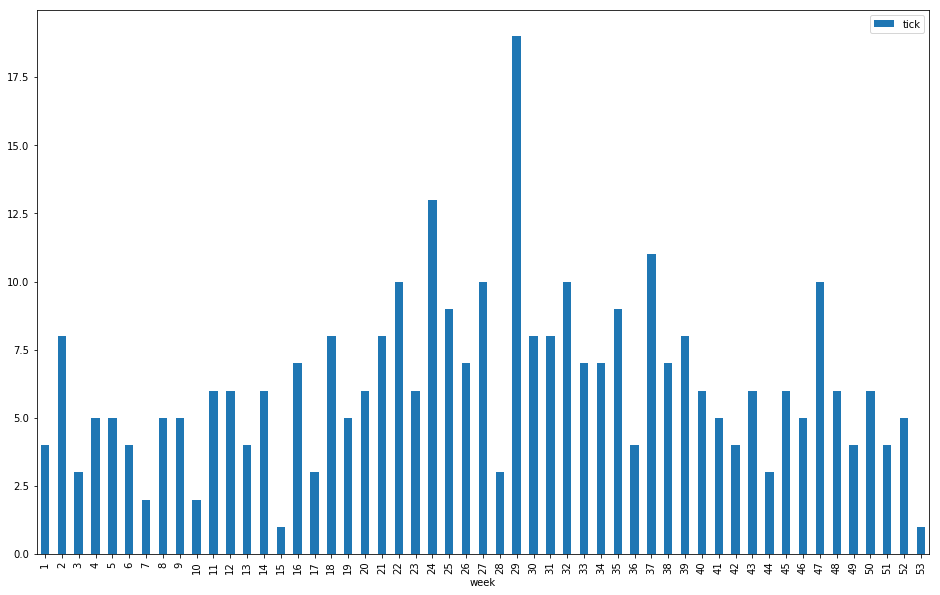

In [161]:
plt.figure()
df2.plot.bar(y = 'tick', figsize = (16,10))